In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/skin_cancer.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['has_cancer'] = le.fit_transform(df['has_cancer'])


In [ ]:
X = df.drop('has_cancer', axis=1)
y = df['has_cancer']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["No Cancer", "Has Cancer"]))


 Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.46      1.00      0.63         6
  Has Cancer       1.00      0.50      0.67        14

    accuracy                           0.65        20
   macro avg       0.73      0.75      0.65        20
weighted avg       0.84      0.65      0.66        20



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

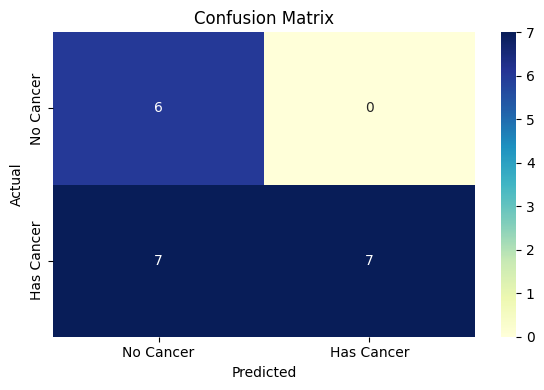

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Cancer', 'Has Cancer'], yticklabels=['No Cancer', 'Has Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

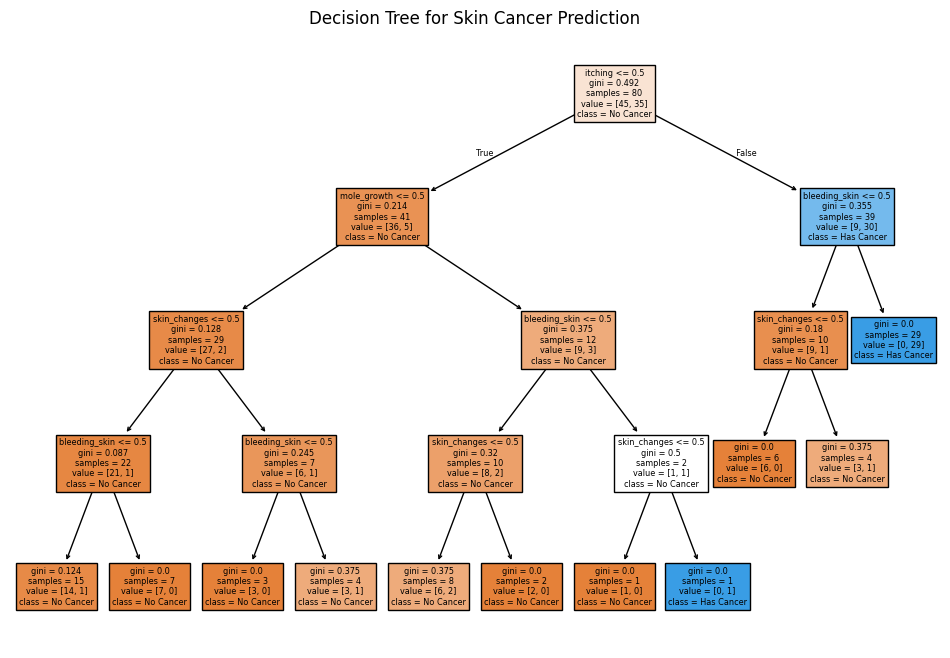

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No Cancer', 'Has Cancer'], filled=True)
plt.title("Decision Tree for Skin Cancer Prediction")
plt.show()